In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils import *

## profiling

In [2]:
L2READTR = 'l2_read_transactions'
L2WRITETR = 'l2_write_transactions'
DRAMREADB = 'dram_read_bytes'
DRAMWRITEB = 'dram_write_bytes'

cacheline = 64

In [3]:
l2rt = pd.read_csv('./src/vgg16/multigpu_and_allreduce/l2_read_t.csv')
l2rt = l2rt.drop(0)
l2rt = l2rt.dropna(subset=[L2READTR])
l2rt = l2rt.reset_index(drop=True)


l2wt = pd.read_csv('./src/vgg16/multigpu_and_allreduce/l2_write_t.csv')
l2wt = l2wt.drop(0)
l2wt = l2wt.dropna(subset=[L2WRITETR])
l2wt = l2wt.reset_index(drop=True)


dramrb = pd.read_csv('./src/vgg16/multigpu_and_allreduce/dram_read_b.csv')
dramrb = dramrb.drop(0)
dramrb = dramrb.dropna(subset=[DRAMREADB])
dramrb = dramrb.reset_index(drop=True)


dramwb = pd.read_csv('./src/vgg16/multigpu_and_allreduce/dram_write_b.csv')
dramwb = dramwb.drop(0)
dramwb = dramwb.dropna(subset=[DRAMWRITEB])
dramwb = dramwb.reset_index(drop=True)

In [4]:
delimeter = find_delimeter(l2rt)

In [5]:
l2rt_cp, l2rt_cm, _ = separate_streams(l2rt, L2READTR, delimeter)

In [6]:
l2rt_cm.max()

32245428.0

In [7]:
l2rt_cp.max()

163878788.0

In [8]:
l2wt_cp, l2wt_cm, _ = separate_streams(l2wt, L2WRITETR, delimeter)

In [9]:
dramrb_cp, dramrb_cm, _ = separate_streams(dramrb, DRAMREADB, delimeter)
dramwb_cp, dramwb_cm, _ = separate_streams(dramwb, DRAMWRITEB, delimeter)

In [10]:
dramrt_cp = dramrb_cp/cacheline
dramrt_cm = dramrb_cm/cacheline

dramwt_cp = dramwb_cp/cacheline
dramwt_cm = dramwb_cm/cacheline

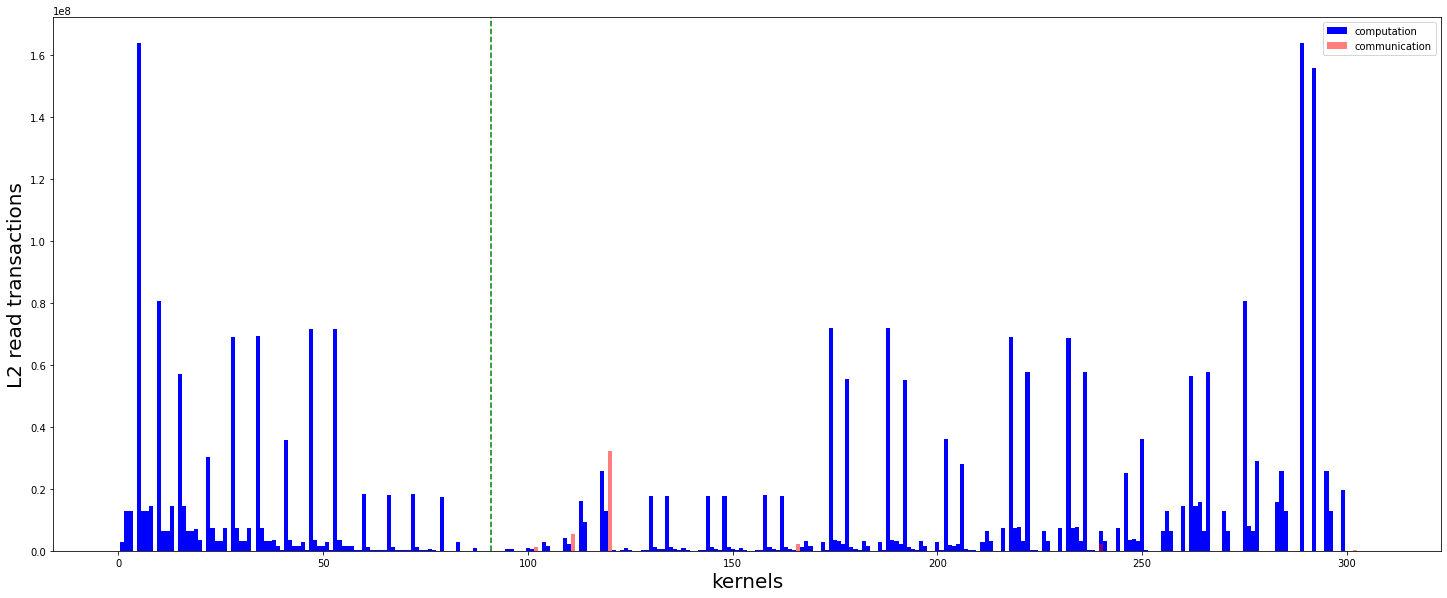

In [11]:
plot_bar_overlap(l2rt_cp, l2rt_cm, delimeter, ylabel='L2 read transactions', xlabel='kernels', label1='computation', label2='communication')

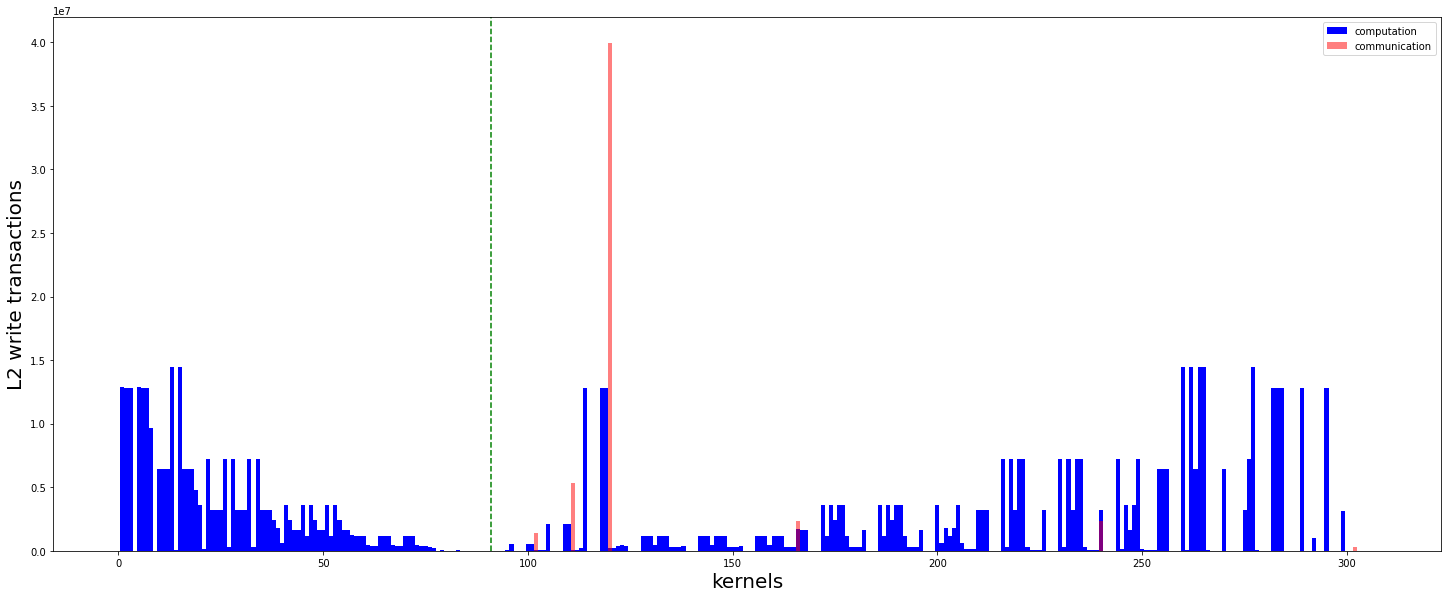

In [12]:
plot_bar_overlap(l2wt_cp, l2wt_cm, delimeter, ylabel='L2 write transactions', xlabel='kernels', label1='computation', label2='communication')

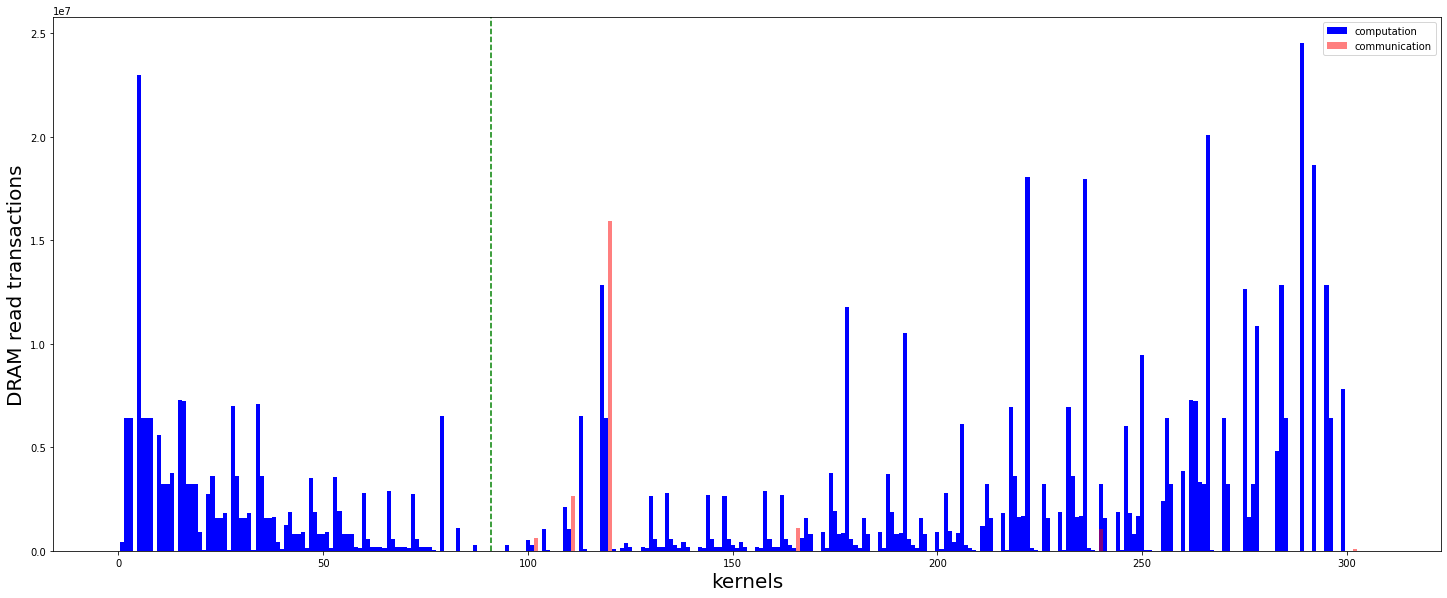

In [13]:
plot_bar_overlap(dramrt_cp, dramrt_cm, delimeter, ylabel='DRAM read transactions', xlabel='kernels', label1='computation', label2='communication')

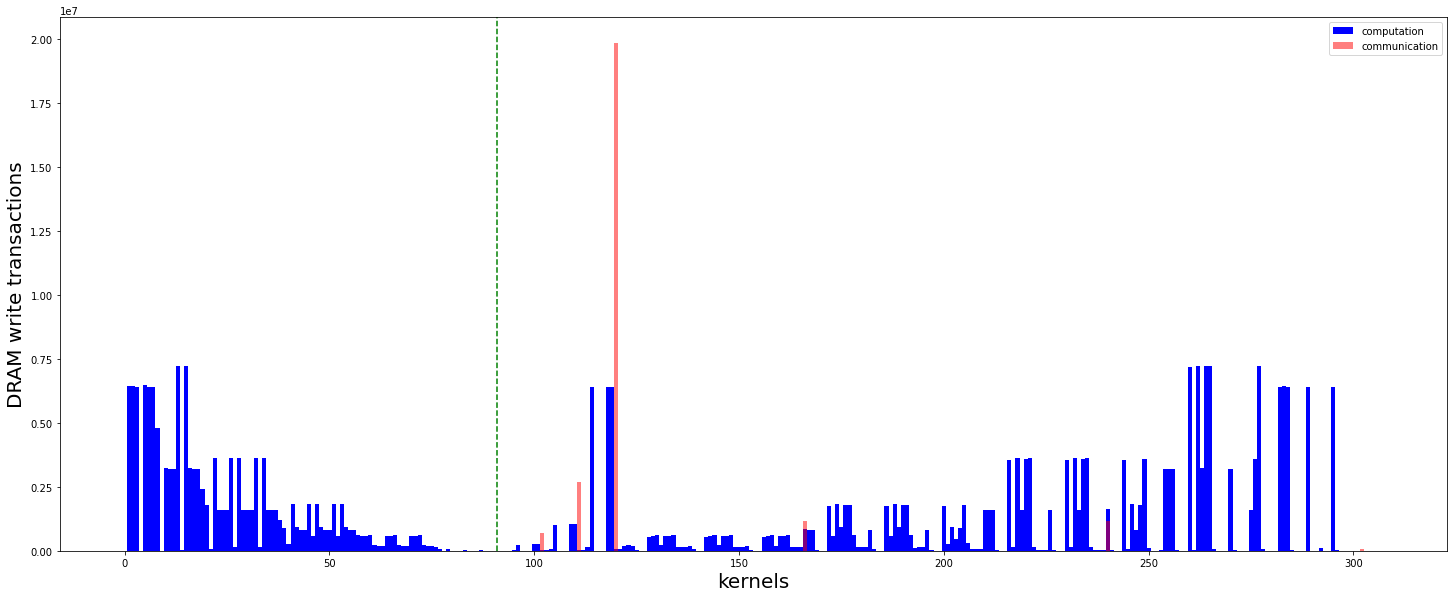

In [14]:
plot_bar_overlap(dramwt_cp, dramwt_cm, delimeter, ylabel='DRAM write transactions', xlabel='kernels', label1='computation', label2='communication')